In [22]:
import pandas as pd
#1. UN General Debate dataset
file = "un-general-debates-blueprint.csv"

df = pd.read_csv("./sample_data/" + file)
df.sample(2)
#Crear una columna llamada length a partir de la longitud de cada uno de los textos de la columna text.
df['length'] = df['text'].str.len()
print(df[['text', 'length']].head())



                                                text  length
0  33: May I first convey to our President the co...   51419
1  177.\t : It is a fortunate coincidence that pr...   29286
2  100.\t  It is a pleasure for me to extend to y...   31839
3  155.\t  May I begin by expressing to Ambassado...   26616
4  176. No doubt each of us, before coming up to ...   25911


In [23]:
#2. Calculo de resúmenes estadísticos por columna
# Solución: Mostrar estadísticos de variables numéricas
df.describe()

,session,year,length
count,7507.000000,7507.000000,7507.000000
mean,49.610763,1994.610763,17967.281604
std,12.892155,12.892155,7860.038463
min,25.000000,1970.000000,2362.000000
25%,39.000000,1984.000000,12077.000000
50%,51.000000,1996.000000,16424.000000
75%,61.000000,2006.000000,22479.500000
max,70.000000,2015.000000,72041.000000


In [24]:
#2. Calculo de resúmenes estadísticos por columna.
# Solución: Mostrar los estadísticos de las variables no numérica: country y speaker utilizando el método describe() con el parámetro include = 'O' genera cinco estadísticos de las variables no numéricas.
df.describe(include='O')

,country,country_name,speaker,position,text
count,7507,7507,7480,4502,7507
unique,199,199,5428,113,7507
top,ALB,Albania,Seyoum Mesfin,Minister for Foreign Affairs,Allow me at the outset to extend to Mr. Mogens...
freq,46,46,12,1813,1


In [27]:
#2. Calculo de resúmenes estadísticos por columna.
# Solución:¿De cuántos países y conferencistas tiene información el conjunto de datos UN General Debate?
num_paises = df['country'].nunique()
num_speakers = df['speaker'].nunique()

print(f"Número de países: {num_paises}")
print(f"Número de conferencistas: {num_speakers}")

Número de países: 199
Número de conferencistas: 5428


In [14]:
#3. Revisar datos faltantes
#Solución: calcular el total de valores faltantes por columna. Tip: utilizar el método sum().
faltantes = df.isna().sum()
print("Valores faltantes por columna:")
print(faltantes)

Valores faltantes por columna:
session    0
year       0
country    0
text       0
length     0
dtype: int64


In [29]:
# Solución: Realizar la sustitución de los NA en la columna speakercon la palabra unknow.
df['speaker'].fillna('unknown', inplace=True)
print("Valores faltantes en speaker después del llenado:")
print(df['speaker'].isna().sum())

Valores faltantes en speaker después del llenado:
0


In [30]:
# Solución: Filtrar y contar registros donde speaker contiene 'Bush'
resultado = df[df['speaker'].str.contains('Bush', na=False)]['speaker'].value_counts()
print(resultado)

speaker
George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: count, dtype: int64


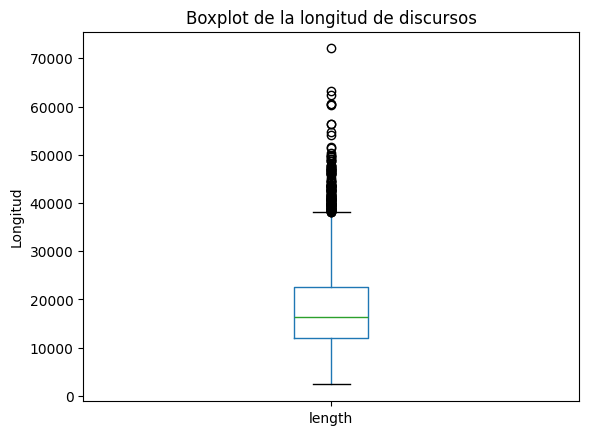

In [31]:
#4. Representación grafica de la distribución de los valores
# Solución: Crea un boxplot de la columna length
df.boxplot(column='length', grid=False)
plt.title("Boxplot de la longitud de discursos")
plt.ylabel("Longitud")
plt.show()

In [ ]:
#4. Representación grafica de la distribución de los valores
# De acuerdo a el resultado obtenido en el boxplot:
#¿En que rango de longitud se encuentra el 50% de los datos?
#Respuesta: Rango del 50% de los datos (IQR): Se encuentra entre el Q1 (percentil 25) y Q3 (percentil 75)
#¿Donde esta la media de la longitud?
#Respuesta: Indicada por la línea dentro de la caja (mediana) o por el promedio.
#¿En que lado se concentran los valores atípicos?
#Respuesta: Se concentran en el lado derecho, indicando algunos discursos muy largos.
#¿Que distribución presentan los datos, left-skwed, rigth-skwed o symmetric?
#Respuesta: Presenta una asimetría a la derecha, con una cola larga hacia valores mayores.


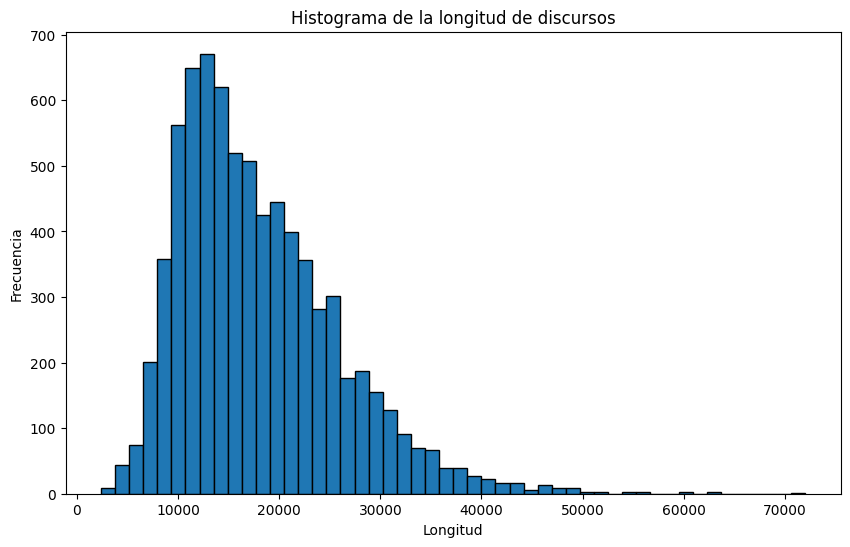

In [32]:
#5. Gráfica de barras o barplot
# Solución: Crear un histograma de la columna length
df['length'].plot.hist(bins=50, edgecolor='black', figsize=(10, 6))
plt.title("Histograma de la longitud de discursos")
plt.xlabel("Longitud")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
#5. Gráfica de barras o barplot
# A diferencia del boxplor anterior ¿Cuáles son los resultados que puedes inferir, de acuerdo a las preguntas realizadas?
# Respuesta: El histograma muestra mejor la distribución y las frecuencias.
# ¿Se puede responder las mismas preguntas?
# Respuesta: Sí, se puede observar que hay un pico de frecuencia en la zona central y la cola derecha es significativa, confirmando la asimetría derecha.
# ¿Qué otras observaciones puedes concluir?
# Respuesta: Se puede identificar que hay pocos pero notables valores extremos en el lado derecho.

In [33]:
#6. Comparación de valores de distribución sobre categorías
# Realizar un filtro de la columna country, donde el país sea: 'USA', 'FRA', 'BGR', 'CHN' y 'RUS'usando el método isin
paises_filtrados = ['USA', 'FRA', 'BGR', 'CHN', 'RUS']
where = df[df['country'].isin(paises_filtrados)]
print(f"Registros filtrados: {len(where)}")
print(where.head())

Registros filtrados: 227
     session  year country   country_name       speaker position  \
17        25  1970     FRA         France  Mr. SCHUMANN      NaN   
65        25  1970     USA  United States      Mr. YOST      NaN   
79        26  1971     BGR       Bulgaria    Mr. BACHEV      NaN   
86        26  1971     CHN          China      Mr. CHOW      NaN   
103       26  1971     FRA         France  Mr. SCHUMANN      NaN   

                                                  text  length  
17   84.\t  Within one month, when we celebrate the...   18308  
65   1.\t It is my privilege to extend to you once ...   34911  
79   37.\t.-Mr. President, on behalf of the delegat...   25984  
86   1.\t  Mr. President, it is my pleasant duty, o...   17198  
103  34.\tIt is toward Asia where all the problems ...   29220  


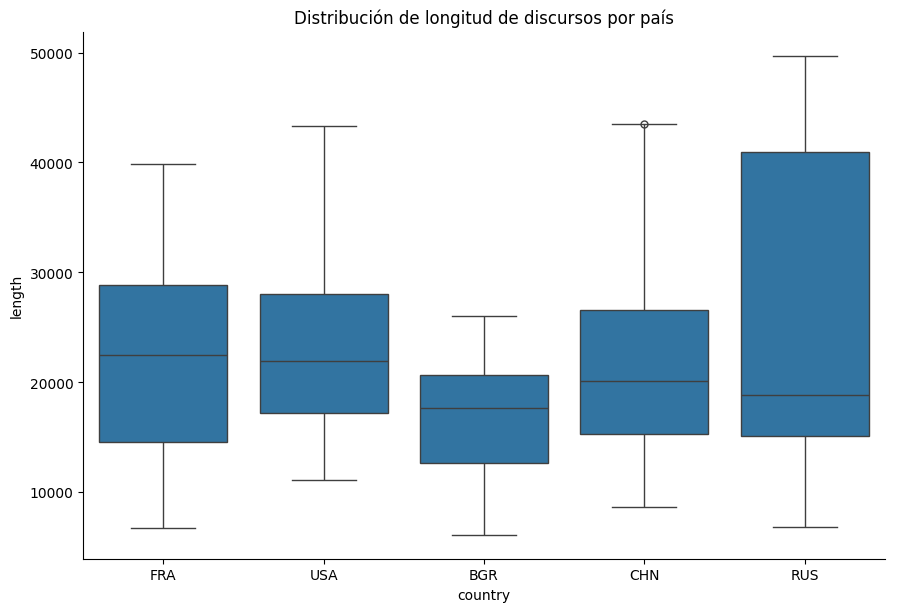

In [34]:
#6. Comparación de valores de distribución sobre categorías
# Crear un catplot del resultado obtenido en where.
sns.catplot(data=where, x='country', y='length', kind='box', height=6, aspect=1.5)
plt.title("Distribución de longitud de discursos por país")
plt.show()

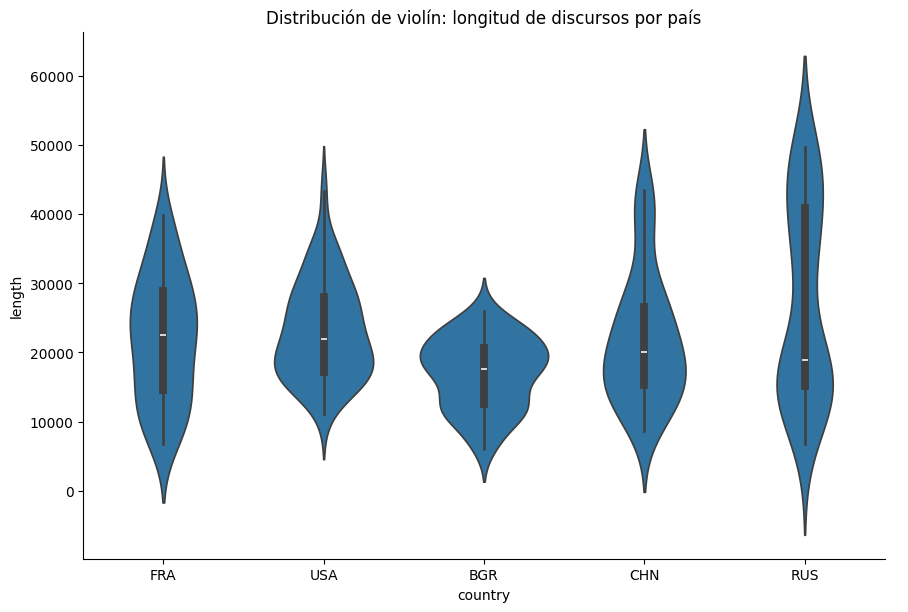

In [35]:
#6. Comparación de valores de distribución sobre categorías
#Crear un gráfico de violín para los resultados filtrados de where.
sns.catplot(data=where, x='country', y='length', kind='violin', height=6, aspect=1.5)
plt.title("Distribución de violín: longitud de discursos por país")
plt.show()

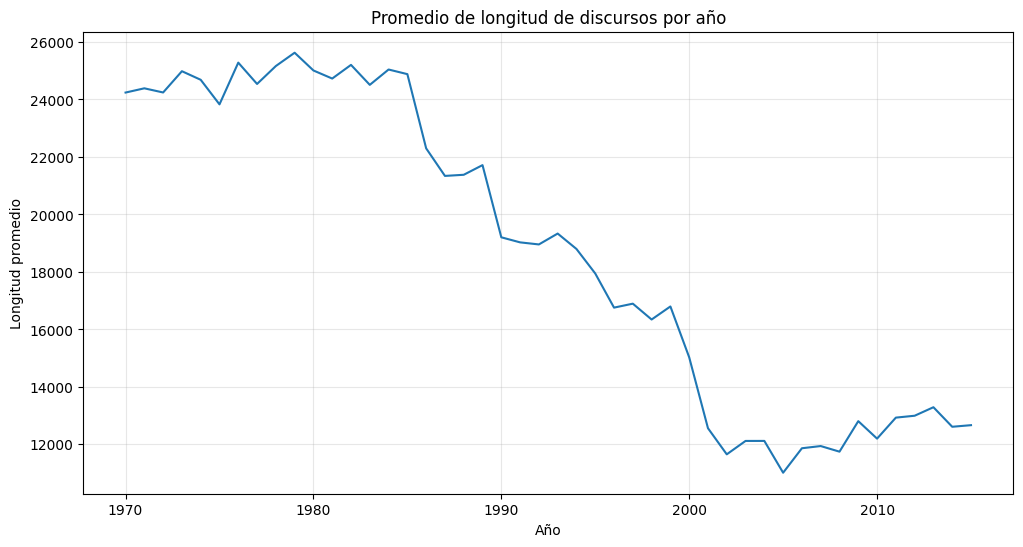

In [36]:
# 7.Visualización de desarrollo sobre el tiempo
# Solución: Agrupar los registros por año (year) y aplicar la función de agregación mean a la columna lenght.
promedio_por_anio = df.groupby('year')['length'].mean()
promedio_por_anio.plot(figsize=(12, 6), title="Promedio de longitud de discursos por año")
plt.xlabel("Año")
plt.ylabel("Longitud promedio")
plt.grid(True, alpha=0.3)
plt.show()